# Transformação de coluna textual em coluna numérica

Trabalho de **Pensamento Computacional / Ciência de Dados**

Este notebook mostra a transformação de uma coluna **textual** do arquivo `Respostas.csv` em uma nova coluna **numérica**, usando uma função Python aplicada com `Series.apply` (pandas).

Todos os nomes de variáveis, comentários e explicações foram escritos em **português do Brasil** para facilitar o entendimento.

## 1. Importar bibliotecas e carregar o conjunto de dados

In [1]:
import pandas as pd
import numpy as np
import re  # para extrair números de textos
import matplotlib.pyplot as plt

# Mostrar gráficos dentro do notebook
%matplotlib inline

# Carregar o arquivo CSV (deixe o arquivo Respostas.csv na mesma pasta deste notebook)
tabela = pd.read_csv('Respostas.csv')

tabela.head()

,nd.,Qual é a sua faixa etária?,Qual é a sua ocupação principal?,"Quantas horas por semana você trabalha ou estuda, em média?",Quanto tempo você dedica a responsabilidades familiares (como cuidar de crianças ou parentes) por semana?,Quantas horas por semana você tem disponível para lazer e hobbies?,Qual é a principal razão pela qual você não tem tempo suficiente para lazer e hobbies?,Você sente que consegue equilibrar sua vida profissional/pessoal com atividades de lazer e hobbies?,Com que frequência você se sente estressado(a) pela falta de tempo para lazer e hobbies?,Quais tipos de atividades de lazer e hobbies você gostaria de ter mais tempo para realizar?,O que você acha que poderia ajudar a aumentar seu tempo disponível para lazer e hobbies?
0,0,18-24 anos,"Estudante, Empregado(a) em tempo integral",40-50 horas,Menos de 5 horas,5-10 horas,Excesso de trabalho ou estudos,"Sim, mas com dificuldade",Às vezes,Jogos ou esportes,Melhor gestão do tempo
1,0,18-24 anos,Estudante,20-30 horas,5-10 horas,Mais de 15 horas,"Tarefas domésticas, escola","Sim, totalmente",Raramente,"Jogos ou esportes, Socialização com amigos e f...",Melhor gestão do tempo
2,0,55 anos ou mais,Outros...,Mais de 50 horas,Menos de 5 horas,Mais de 15 horas,Outros...,"Sim, totalmente",Nunca,Outros...,Outros...
3,0,55 anos ou mais,Outros...,Mais de 50 horas,Menos de 5 horas,Nenhuma,Outros...,"Não, nunca consigo",Nunca,Outros...,Outros...
4,0,25-34 anos,Desempregado(a),Menos de 20 horas,Menos de 5 horas,Mais de 15 horas,Outros...,"Sim, totalmente",Nunca,Outros...,Outros...


## 2. Explorar as colunas de interesse

Vamos localizar as colunas relacionadas a **horas de trabalho/estudo** e **horas de lazer/hobbies**.

Usamos uma busca por palavras-chave no nome das colunas para não depender de espaços em branco ou pequenos detalhes na formatação.

In [2]:
print("Colunas disponíveis no DataFrame:\n")
for coluna in tabela.columns:
    print(coluna)

# Encontrar automaticamente as colunas pela frase-chave
colunas_trabalho = [c for c in tabela.columns if 'trabalha ou estuda' in c]
colunas_lazer = [c for c in tabela.columns if 'lazer e hobbies' in c]

coluna_trabalho_texto = colunas_trabalho[0] if colunas_trabalho else None
coluna_lazer_texto = colunas_lazer[0] if colunas_lazer else None

print('\nColuna de trabalho/estudo encontrada:', coluna_trabalho_texto)
print('Coluna de lazer encontrada:', coluna_lazer_texto)

# Visualizar as primeiras linhas dessas colunas
tabela[[coluna_trabalho_texto, coluna_lazer_texto]].head()

Colunas disponíveis no DataFrame:

nd.
Qual é a sua faixa etária?  
Qual é a sua ocupação principal?  
Quantas horas por semana você trabalha ou estuda, em média?  
Quanto tempo você dedica a responsabilidades familiares (como cuidar de crianças ou parentes) por semana?  
Quantas horas por semana você tem disponível para lazer e hobbies?  
Qual é a principal razão pela qual você não tem tempo suficiente para lazer e hobbies?  
Você sente que consegue equilibrar sua vida profissional/pessoal com atividades de lazer e hobbies?  
Com que frequência você se sente estressado(a) pela falta de tempo para lazer e hobbies?  
Quais tipos de atividades de lazer e hobbies você gostaria de ter mais tempo para realizar?  
O que você acha que poderia ajudar a aumentar seu tempo disponível para lazer e hobbies?  

Coluna de trabalho/estudo encontrada: Quantas horas por semana você trabalha ou estuda, em média?  
Coluna de lazer encontrada: Quantas horas por semana você tem disponível para lazer e hobb

,"Quantas horas por semana você trabalha ou estuda, em média?",Quantas horas por semana você tem disponível para lazer e hobbies?
0,40-50 horas,5-10 horas
1,20-30 horas,Mais de 15 horas
2,Mais de 50 horas,Mais de 15 horas
3,Mais de 50 horas,Nenhuma
4,Menos de 20 horas,Mais de 15 horas


## 2.1 (Opcional) Renomear colunas para nomes mais curtos em português

Aqui criamos nomes **mais curtos e amigáveis em português** para trabalhar ao longo do notebook:

- `horas_trabalho_texto` – texto original das horas de trabalho/estudo.
- `horas_lazer_texto` – texto original das horas de lazer/hobbies.

In [3]:
mapeamento_nomes = {}
if coluna_trabalho_texto is not None:
    mapeamento_nomes[coluna_trabalho_texto] = 'horas_trabalho_texto'
if coluna_lazer_texto is not None:
    mapeamento_nomes[coluna_lazer_texto] = 'horas_lazer_texto'

tabela = tabela.rename(columns=mapeamento_nomes)

print("Novos nomes das colunas (após renomear):\n")
print(tabela.columns)

tabela[['horas_trabalho_texto', 'horas_lazer_texto']].head()

Novos nomes das colunas (após renomear):

Index(['nd.', 'Qual é a sua faixa etária?  ',
       'Qual é a sua ocupação principal?  ', 'horas_trabalho_texto',
       'Quanto tempo você dedica a responsabilidades familiares (como cuidar de crianças ou parentes) por semana?  ',
       'horas_lazer_texto',
       'Qual é a principal razão pela qual você não tem tempo suficiente para lazer e hobbies?  ',
       'Você sente que consegue equilibrar sua vida profissional/pessoal com atividades de lazer e hobbies?  ',
       'Com que frequência você se sente estressado(a) pela falta de tempo para lazer e hobbies?  ',
       'Quais tipos de atividades de lazer e hobbies você gostaria de ter mais tempo para realizar?  ',
       'O que você acha que poderia ajudar a aumentar seu tempo disponível para lazer e hobbies?  '],
      dtype='object')


,horas_trabalho_texto,horas_lazer_texto
0,40-50 horas,5-10 horas
1,20-30 horas,Mais de 15 horas
2,Mais de 50 horas,Mais de 15 horas
3,Mais de 50 horas,Nenhuma
4,Menos de 20 horas,Mais de 15 horas


## 3. Função de transformação: texto → número

### Lógica geral da função `converter_horas_texto` (explicação)

1. A função recebe uma resposta textual, por exemplo:
   - `"Menos de 20 horas"`
   - `"20-30 horas"`
   - `"Mais de 50 horas"`
2. Converte o texto para minúsculo e remove espaços extras.
3. Verifica alguns padrões com `if/elif`:
   - Se o texto contém **"menos de"**, pegamos o número da frase (por exemplo, 20) e usamos a **metade** como estimativa (10 horas).  
   - Se o texto contém **"mais de"**, pegamos o número da frase (por exemplo, 50) e somamos **5 horas** como estimativa mínima (55 horas).  
   - Se o texto contém um **intervalo**, como `"20-30"`, calculamos a **média** entre os dois valores (25 horas).  
4. Se nenhum dos casos específicos funcionar, tentamos extrair algum número da string.
5. Se nada puder ser interpretado, devolvemos `NaN` (valor ausente).

In [4]:
def converter_horas_texto(texto):
    """Converte uma resposta textual de horas semanais em um valor numérico aproximado.
    
    Exemplos:
    - "Menos de 20 horas" -> 10
    - "Mais de 50 horas" -> 55
    - "20-30 horas" -> 25
    - "30-40" -> 35
    """
    
    # Caso o valor seja ausente (NaN)
    if pd.isna(texto):
        return np.nan
    
    # Garante que é string e padroniza para minúsculas
    texto_str = str(texto).strip().lower()
    if texto_str == "":
        return np.nan
    
    # Caso 1: "Menos de X horas"
    if "menos de" in texto_str:
        numeros = re.findall(r"\d+", texto_str)
        if numeros:
            limite = int(numeros[0])
            # Estimativa: metade do valor limite
            return limite * 0.5
        # Valor padrão se não achar número
        return 10
    
    # Caso 2: "Mais de X horas"
    if "mais de" in texto_str:
        numeros = re.findall(r"\d+", texto_str)
        if numeros:
            limite = int(numeros[0])
            # Estimativa: um pouco acima do limite
            return limite + 5
        # Valor padrão se não achar número
        return 55
    
    # Caso 3: intervalo tipo "20-30 horas" ou "20 - 30"
    intervalo = re.findall(r"(\d+)\s*-\s*(\d+)", texto_str)
    if intervalo:
        inicio, fim = intervalo[0]
        return (int(inicio) + int(fim)) / 2
    
    # Caso 4: se existir pelo menos um número simples, usar esse número
    numeros = re.findall(r"\d+", texto_str)
    if numeros:
        return float(numeros[0])
    
    # Se não reconhecermos nenhum padrão, retorna NaN
    return np.nan

## 4. Aplicar a função com `Series.apply`

Vamos criar duas novas colunas **numéricas**:

- `horas_trabalho_num` – valor numérico aproximado de horas de trabalho/estudo.  
- `horas_lazer_num` – valor numérico aproximado de horas de lazer/hobbies.

In [5]:
# Aplicar a função na coluna de texto de trabalho/estudo
tabela['horas_trabalho_num'] = tabela['horas_trabalho_texto'].apply(converter_horas_texto)

# Aplicar a função na coluna de texto de lazer (se existir)
if 'horas_lazer_texto' in tabela.columns:
    tabela['horas_lazer_num'] = tabela['horas_lazer_texto'].apply(converter_horas_texto)
else:
    tabela['horas_lazer_num'] = np.nan

tabela[['horas_trabalho_texto', 'horas_trabalho_num', 'horas_lazer_texto', 'horas_lazer_num']].head()

,horas_trabalho_texto,horas_trabalho_num,horas_lazer_texto,horas_lazer_num
0,40-50 horas,45.0,5-10 horas,7.5
1,20-30 horas,25.0,Mais de 15 horas,20.0
2,Mais de 50 horas,55.0,Mais de 15 horas,20.0
3,Mais de 50 horas,55.0,Nenhuma,NaN
4,Menos de 20 horas,10.0,Mais de 15 horas,20.0


## 5. Análise básica dos resultados numéricos

Agora que temos as colunas numéricas, podemos:

- Calcular **médias** e outros indicadores.  
- Ver como os valores estão distribuídos.  
- Comparar horas de trabalho com horas de lazer.

In [6]:
print("Estatísticas descritivas - horas de trabalho/estudo (numérico):\n")
print(tabela['horas_trabalho_num'].describe())

print("\nMédia de horas de trabalho/estudo por semana:", tabela['horas_trabalho_num'].mean())

print("\nEstatísticas descritivas - horas de lazer (numérico):\n")
print(tabela['horas_lazer_num'].describe())

print("\nMédia de horas de lazer por semana:", tabela['horas_lazer_num'].mean())

Estatísticas descritivas - horas de trabalho/estudo (numérico):

count    82.000000
mean     37.012195
std      14.966212
min      10.000000
25%      25.000000
50%      35.000000
75%      45.000000
max      55.000000
Name: horas_trabalho_num, dtype: float64

Média de horas de trabalho/estudo por semana: 37.01219512195122

Estatísticas descritivas - horas de lazer (numérico):

count    78.000000
mean     10.801282
std       7.269104
min       2.500000
25%       2.500000
50%       7.500000
75%      20.000000
max      20.000000
Name: horas_lazer_num, dtype: float64

Média de horas de lazer por semana: 10.801282051282051


### Relação entre horas de trabalho e horas de lazer

Vamos calcular a **correlação** entre as duas variáveis e fazer um gráfico de dispersão para visualizar a relação.

Tabela de médias da relação trabalho x lazer:

   horas_trabalho_num  horas_lazer_num
0                10.0        13.863636
1                25.0        14.166667
2                35.0        11.964286
3                45.0         6.750000
4                55.0         9.722222


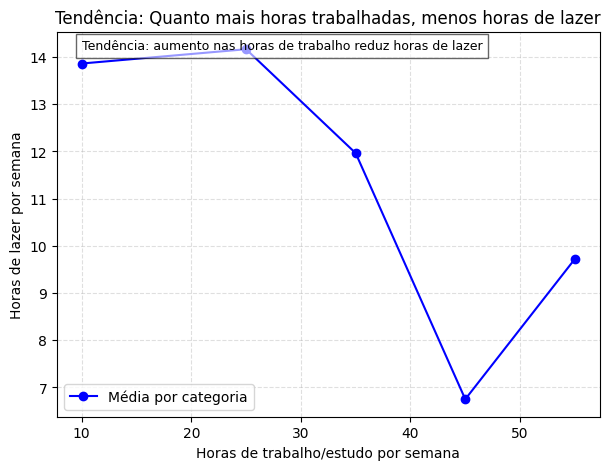

In [9]:
# 1. Criar tabela de médias agrupando por horas de trabalho
tabela_media = tabela.groupby('horas_trabalho_num', as_index=False)['horas_lazer_num'].mean()

print("Tabela de médias da relação trabalho x lazer:\n")
print(tabela_media)

# 2. Gráfico com menos pontos (apenas médias)
plt.figure(figsize=(7, 5))
plt.plot(tabela_media['horas_trabalho_num'], tabela_media['horas_lazer_num'], 
         marker='o', linestyle='-', color='blue', label='Média por categoria')

plt.xlabel('Horas de trabalho/estudo por semana')
plt.ylabel('Horas de lazer por semana')
plt.title('Tendência: Quanto mais horas trabalhadas, menos horas de lazer')
plt.grid(True, linestyle='--', alpha=0.4)

# 3. Linha extra explicando a tendência no próprio gráfico
plt.text(
    x=tabela_media['horas_trabalho_num'].min(), 
    y=tabela_media['horas_lazer_num'].max(),
    s='Tendência: aumento nas horas de trabalho reduz horas de lazer',
    fontsize=9,
    bbox=dict(facecolor='white', alpha=0.6)
)
plt.legend()
plt.show()

## 6. Salvar o DataFrame final com as novas colunas

Podemos salvar a tabela com as colunas numéricas em um novo arquivo CSV, que pode ser enviado junto no repositório do GitHub:

In [ ]:
tabela.to_csv('Respostas_transformadas_ptbr.csv', index=False)
print('Arquivo Respostas_transformadas_ptbr.csv salvo com sucesso!!')

Arquivo Respostas_transformadas_ptbr.csv salvo com sucesso!
